In [27]:
vec1 = cpm[0:3]
vec1
vec2 = cpm[4:7]
vec2

array([[23.54981483, 75.19931927,  0.92682634, ...,  4.40242513,
        59.35901448,  2.06429504],
       [22.65642358, 70.64723451,  1.04143035, ...,  4.48452662,
        64.46241344,  1.95533862]])

In [28]:
meanTumor=np.mean(vec1,axis=0)
meanTumor

array([15.20683536, 55.69369917,  0.96486138, ...,  1.62765159,
       86.01584088,  3.1294287 ])

In [29]:
meanControl=np.mean(vec2,axis=0)
meanControl

array([23.10311921, 72.92327689,  0.98412835, ...,  4.44347588,
       61.91071396,  2.00981683])

In [30]:
from scipy.stats import ttest_ind

In [31]:
pvalue=ttest_ind(vec1,vec2).pvalue
pvalue

array([0.00139049, 0.00957123, 0.95022305, ..., 0.00591172, 0.00185351,
       0.01790777])

In [32]:
log2FC=meanTumor-meanControl
log2FC

array([-7.89628385e+00, -1.72295777e+01, -1.92669657e-02, ...,
       -2.81582429e+00,  2.41051269e+01,  1.11961187e+00])

In [33]:
result=np.stack((meanTumor,meanControl,log2FC,pvalue),axis=0)
result

array([[ 1.52068354e+01,  5.56936992e+01,  9.64861382e-01, ...,
         1.62765159e+00,  8.60158409e+01,  3.12942870e+00],
       [ 2.31031192e+01,  7.29232769e+01,  9.84128348e-01, ...,
         4.44347588e+00,  6.19107140e+01,  2.00981683e+00],
       [-7.89628385e+00, -1.72295777e+01, -1.92669657e-02, ...,
        -2.81582429e+00,  2.41051269e+01,  1.11961187e+00],
       [ 1.39049477e-03,  9.57122684e-03,  9.50223054e-01, ...,
         5.91171637e-03,  1.85350932e-03,  1.79077673e-02]])

In [34]:
r=pd.DataFrame(result)
r=r.T

In [35]:
r.columns=["meanTumor","meanControl","log2FC","pvalue"]
r

,meanTumor,meanControl,log2FC,pvalue
0,15.206835,23.103119,-7.896284,0.001390
1,55.693699,72.923277,-17.229578,0.009571
2,0.964861,0.984128,-0.019267,0.950223
3,0.169333,0.000000,0.169333,0.133302
4,0.677514,0.803946,-0.126432,0.104819
...,...,...,...,...
17835,0.994175,0.825294,0.168881,0.092199
17836,44.676443,84.661253,-39.984810,0.000039
17837,1.627652,4.443476,-2.815824,0.005912
17838,86.015841,61.910714,24.105127,0.001854


In [36]:
r['gene']=id1
col_1=r.pop('gene')
r.insert(0,'gene',col_1)
r

,gene,meanTumor,meanControl,log2FC,pvalue
0,138241,15.206835,23.103119,-7.896284,0.001390
1,9374,55.693699,72.923277,-17.229578,0.009571
2,255762,0.964861,0.984128,-0.019267,0.950223
3,9074,0.169333,0.000000,0.169333,0.133302
4,10599,0.677514,0.803946,-0.126432,0.104819
...,...,...,...,...,...
17835,1088,0.994175,0.825294,0.168881,0.092199
17836,643155,44.676443,84.661253,-39.984810,0.000039
17837,4882,1.627652,4.443476,-2.815824,0.005912
17838,81689,86.015841,61.910714,24.105127,0.001854


In [37]:
r['pvalue']=r['pvalue'].fillna(1)
r

,gene,meanTumor,meanControl,log2FC,pvalue
0,138241,15.206835,23.103119,-7.896284,0.001390
1,9374,55.693699,72.923277,-17.229578,0.009571
2,255762,0.964861,0.984128,-0.019267,0.950223
3,9074,0.169333,0.000000,0.169333,0.133302
4,10599,0.677514,0.803946,-0.126432,0.104819
...,...,...,...,...,...
17835,1088,0.994175,0.825294,0.168881,0.092199
17836,643155,44.676443,84.661253,-39.984810,0.000039
17837,4882,1.627652,4.443476,-2.815824,0.005912
17838,81689,86.015841,61.910714,24.105127,0.001854


In [38]:
r.to_csv("deg.csv",index=False)

In [39]:
from bioinfokit import analys, visuz
from bioinfokit.visuz import gene_exp

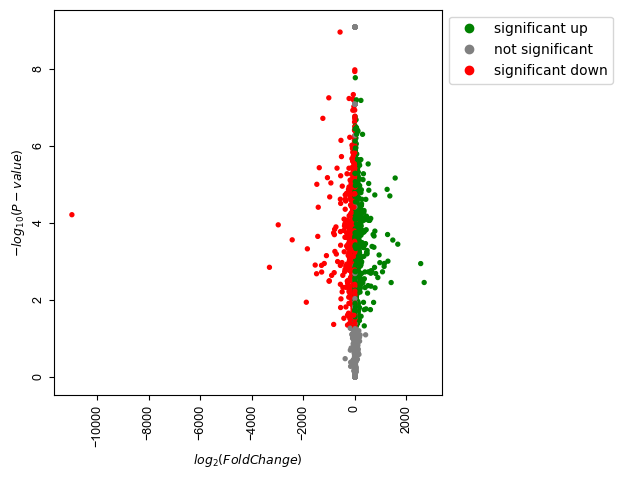

In [40]:
gene_exp.volcano(r, lfc='log2FC', pv='pvalue', plotlegend=True, legendpos='upper right', 
    legendanchor=(1.46,1),show=True)